### Capstone Project

In [1]:
#import libraries

import zipfile
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statistics
import scipy.stats
from sklearn import preprocessing
from sklearn.cluster import KMeans
import seaborn as sns
from scipy import stats
import requests
from math import pi

### Importing the data

In [2]:
#Download the zip file from URL

url = 'https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Datasets/CHDI/chsi_dataset.zip'
target_path = 'DATA606.zip'

response = requests.get(url, stream=True)
handle = open(target_path, "wb")
for chunk in response.iter_content(chunk_size=512):
    if chunk:  # filter out keep-alive new chunks
        handle.write(chunk)
handle.close()

In [3]:
#define the two dataframes

zf = zipfile.ZipFile('DATA606.zip')
#I have over 140 columns and I will only need select ones which I've defined in the lists below
#demographics
dem_col= ['CHSI_County_Name','County_FIPS_Code','CHSI_State_Name','State_FIPS_Code', 'CHSI_State_Abbr', 'Population_Size', 'Poverty','Age_19_Under', 'Age_19_64', 'Age_65_84', 'Age_85_and_Over']
#SummaryMeasuresOfHealth
heal_mea_col= ['CHSI_County_Name','County_FIPS_Code','CHSI_State_Name','State_FIPS_Code', 'CHSI_State_Abbr', 'ALE']
#PreventiveServicesUse
prev_col= ['CHSI_County_Name','County_FIPS_Code','CHSI_State_Name','State_FIPS_Code', 'CHSI_State_Abbr', 'Pap_Smear', 'Mammogram', 'Proctoscopy', 'Pneumo_Vax', 'Flu_Vac']
#MeasuresOfBirthAndDeath
mbd_col= ['CHSI_County_Name','County_FIPS_Code','CHSI_State_Name','State_FIPS_Code', 'CHSI_State_Abbr', 'LBW', 'Premature', 'Late_Care', 'Infant_Mortality', 'Brst_Cancer', 'Col_Cancer', 'CHD', 'Lung_Cancer', 'Stroke' ]
#RiskFactorsAndAccessToCare
risk_col= ['CHSI_County_Name', 'County_FIPS_Code','CHSI_State_Name','State_FIPS_Code', 'CHSI_State_Abbr', 'Obesity', 'High_Blood_Pres', 'Diabetes', 'Elderly_Medicare','Disabled_Medicare', 'Uninsured', 'Prim_Care_Phys_Rate', 'Dentist_Rate', 'Community_Health_Center_Ind']

#extract csv file from zip file/define dataframes
df0 = pd.read_csv(zf.open('DEMOGRAPHICS.csv'), usecols= dem_col)
df1 = pd.read_csv(zf.open('SUMMARYMEASURESOFHEALTH.csv'), usecols= heal_mea_col)
df2 = pd.read_csv(zf.open('PREVENTIVESERVICESUSE.csv'), usecols= prev_col)
df3 = pd.read_csv(zf.open('MEASURESOFBIRTHANDDEATH.csv'), usecols= mbd_col) 
df4 = pd.read_csv(zf.open('RISKFACTORSANDACCESSTOCARE.csv'), usecols= risk_col)
pd.set_option('display.max_columns', 150)

In [4]:
#Merge df0, df1, df2, and df3
df= df0.merge(df1).merge(df2).merge(df3).merge(df4)
#display 5 first rows
df.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Population_Size,Poverty,Age_19_Under,Age_19_64,Age_65_84,Age_85_and_Over,ALE,Pap_Smear,Mammogram,Proctoscopy,Pneumo_Vax,Flu_Vac,LBW,Premature,Late_Care,Infant_Mortality,Brst_Cancer,Col_Cancer,CHD,Lung_Cancer,Stroke,Obesity,High_Blood_Pres,Diabetes,Uninsured,Elderly_Medicare,Disabled_Medicare,Prim_Care_Phys_Rate,Dentist_Rate,Community_Health_Center_Ind
0,1,1,Autauga,Alabama,AL,48612,10.4,26.9,62.3,9.8,0.9,74.9,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,8.1,14.3,12.9,5.9,34.1,15.9,172.4,65.3,73.9,24.5,29.1,14.2,5690,4762,1209,45.3,22.6,1
1,1,3,Baldwin,Alabama,AL,162586,10.2,23.5,60.3,14.5,1.8,76.6,86.1,82.0,44.1,58.7,61.8,8.6,15.3,15.3,7.1,22.5,15.3,156.5,62.1,48.7,23.6,30.5,7.2,19798,22635,3839,67.0,30.8,1
2,1,5,Barbour,Alabama,AL,28414,22.1,24.3,62.5,11.6,1.6,74.5,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,11.0,16.7,26.0,7.1,30.5,23.4,95.3,70.6,84.5,25.6,-1111.1,6.6,5126,3288,1092,45.8,24.6,1
3,1,7,Bibb,Alabama,AL,21516,16.8,24.6,63.3,10.9,1.2,73.2,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,8.7,13.7,16.3,9.8,30.1,17.4,184.7,64.6,144.6,-1111.1,-1111.1,13.1,3315,2390,974,41.8,18.6,1
4,1,9,Blount,Alabama,AL,55725,11.9,24.5,62.1,12.1,1.3,76.1,87.2,-1111.1,-1111.1,-1111.1,-1111.1,7.6,12.8,16.7,9.0,30.2,16.8,148.2,71.7,47.3,24.2,-1111.1,8.4,8131,5019,1300,16.2,10.8,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3141 entries, 0 to 3140
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   State_FIPS_Code              3141 non-null   int64  
 1   County_FIPS_Code             3141 non-null   int64  
 2   CHSI_County_Name             3141 non-null   object 
 3   CHSI_State_Name              3141 non-null   object 
 4   CHSI_State_Abbr              3141 non-null   object 
 5   Population_Size              3141 non-null   int64  
 6   Poverty                      3141 non-null   float64
 7   Age_19_Under                 3141 non-null   float64
 8   Age_19_64                    3141 non-null   float64
 9   Age_65_84                    3141 non-null   float64
 10  Age_85_and_Over              3141 non-null   float64
 11  ALE                          3141 non-null   float64
 12  Pap_Smear                    3141 non-null   float64
 13  Mammogram         

### Exploratory Data Analysis-Data Cleaning 


In [6]:
#add a county column that contains the county and state.
df.insert(3, 'county', df['CHSI_County_Name']+ '_'+ df['CHSI_State_Name'])

#Based on dataset documentation, negative values indicate missing or unreported data. 
#I replace the negative values with NaN so I can have accurate statistics 
df_clean = df.replace({ -1111.1: np.nan, -2222.2: np.nan, -2222.0: np.nan})

#Fill NaN values with the averages. Deleting columns can result in huge loss of important data.
df_clean.fillna(df_clean.mean(), inplace= True)

#Normalization
#normalize uninsured. Number to percentage.
df_clean['Uninsured%']= df_clean['Uninsured']/df_clean['Population_Size']*100

#other columns are already percentages or per 100000 population and don't need any normalization

In [7]:
#top 5 rows
df_clean.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,county,CHSI_State_Name,CHSI_State_Abbr,Population_Size,Poverty,Age_19_Under,Age_19_64,Age_65_84,Age_85_and_Over,ALE,Pap_Smear,Mammogram,Proctoscopy,Pneumo_Vax,Flu_Vac,LBW,Premature,Late_Care,Infant_Mortality,Brst_Cancer,Col_Cancer,CHD,Lung_Cancer,Stroke,Obesity,High_Blood_Pres,Diabetes,Uninsured,Elderly_Medicare,Disabled_Medicare,Prim_Care_Phys_Rate,Dentist_Rate,Community_Health_Center_Ind,Uninsured%
0,1.0,1.0,Autauga,Autauga_Alabama,Alabama,AL,48612.0,10.4,26.9,62.3,9.8,0.9,74.9,82.009561,80.03255,43.145354,65.526638,69.432507,8.1,14.3,12.9,5.9,34.1,15.9,172.4,65.3,73.9,24.500000,29.100000,14.2,5690.0,4762.0,1209.0,45.3,22.6,1.0,11.704929
1,1.0,3.0,Baldwin,Baldwin_Alabama,Alabama,AL,162586.0,10.2,23.5,60.3,14.5,1.8,76.6,86.100000,82.00000,44.100000,58.700000,61.800000,8.6,15.3,15.3,7.1,22.5,15.3,156.5,62.1,48.7,23.600000,30.500000,7.2,19798.0,22635.0,3839.0,67.0,30.8,1.0,12.176940
2,1.0,5.0,Barbour,Barbour_Alabama,Alabama,AL,28414.0,22.1,24.3,62.5,11.6,1.6,74.5,82.009561,80.03255,43.145354,65.526638,69.432507,11.0,16.7,26.0,7.1,30.5,23.4,95.3,70.6,84.5,25.600000,26.480946,6.6,5126.0,3288.0,1092.0,45.8,24.6,1.0,18.040403
3,1.0,7.0,Bibb,Bibb_Alabama,Alabama,AL,21516.0,16.8,24.6,63.3,10.9,1.2,73.2,82.009561,80.03255,43.145354,65.526638,69.432507,8.7,13.7,16.3,9.8,30.1,17.4,184.7,64.6,144.6,24.145189,26.480946,13.1,3315.0,2390.0,974.0,41.8,18.6,1.0,15.407139
4,1.0,9.0,Blount,Blount_Alabama,Alabama,AL,55725.0,11.9,24.5,62.1,12.1,1.3,76.1,87.200000,80.03255,43.145354,65.526638,69.432507,7.6,12.8,16.7,9.0,30.2,16.8,148.2,71.7,47.3,24.200000,26.480946,8.4,8131.0,5019.0,1300.0,16.2,10.8,2.0,14.591297


In [8]:
#general statistics 
df_clean.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
State_FIPS_Code,3141.0,30.304680,15.134423,1.000000,18.000000,29.000000,45.000000,5.600000e+01
County_FIPS_Code,3141.0,103.716651,107.999484,1.000000,35.000000,79.000000,133.000000,8.400000e+02
Population_Size,3141.0,94368.164279,306431.655763,62.000000,11211.000000,25235.000000,64040.000000,9.935475e+06
Poverty,3141.0,13.350159,4.882530,2.200000,9.800000,12.600000,16.200000,3.620000e+01
Age_19_Under,3141.0,24.806527,3.281777,1.400000,22.700000,24.600000,26.400000,4.720000e+01
Age_19_64,3141.0,60.289398,3.356056,47.600000,58.300000,60.300000,62.300000,8.330000e+01
Age_65_84,3141.0,12.789430,3.334035,2.100000,10.700000,12.500000,14.700000,2.920000e+01
Age_85_and_Over,3141.0,2.115409,0.949119,0.100000,1.500000,1.900000,2.600000,7.600000e+00
ALE,3141.0,76.322874,1.996864,66.600000,75.000000,76.500000,77.700000,8.130000e+01
Pap_Smear,3141.0,82.009561,3.757744,58.900000,82.009561,82.009561,82.400000,9.820000e+01


### Exploratory Data Analysis-Visualization


In [9]:
#get uninsured% averages for each state

unin_y= []
state_x=[]
for i in df_clean.CHSI_State_Name.unique():
    a= statistics.mean(df_clean[df_clean['CHSI_State_Name']== i]['Uninsured%'])
    unin_y.append(a)
    state_x.append(i)
    
d = {'States':state_x,'Uninsured%avg':unin_y}
uninsured_df= pd.DataFrame(d)
uninsured_df.sort_values('Uninsured%avg', inplace= True)

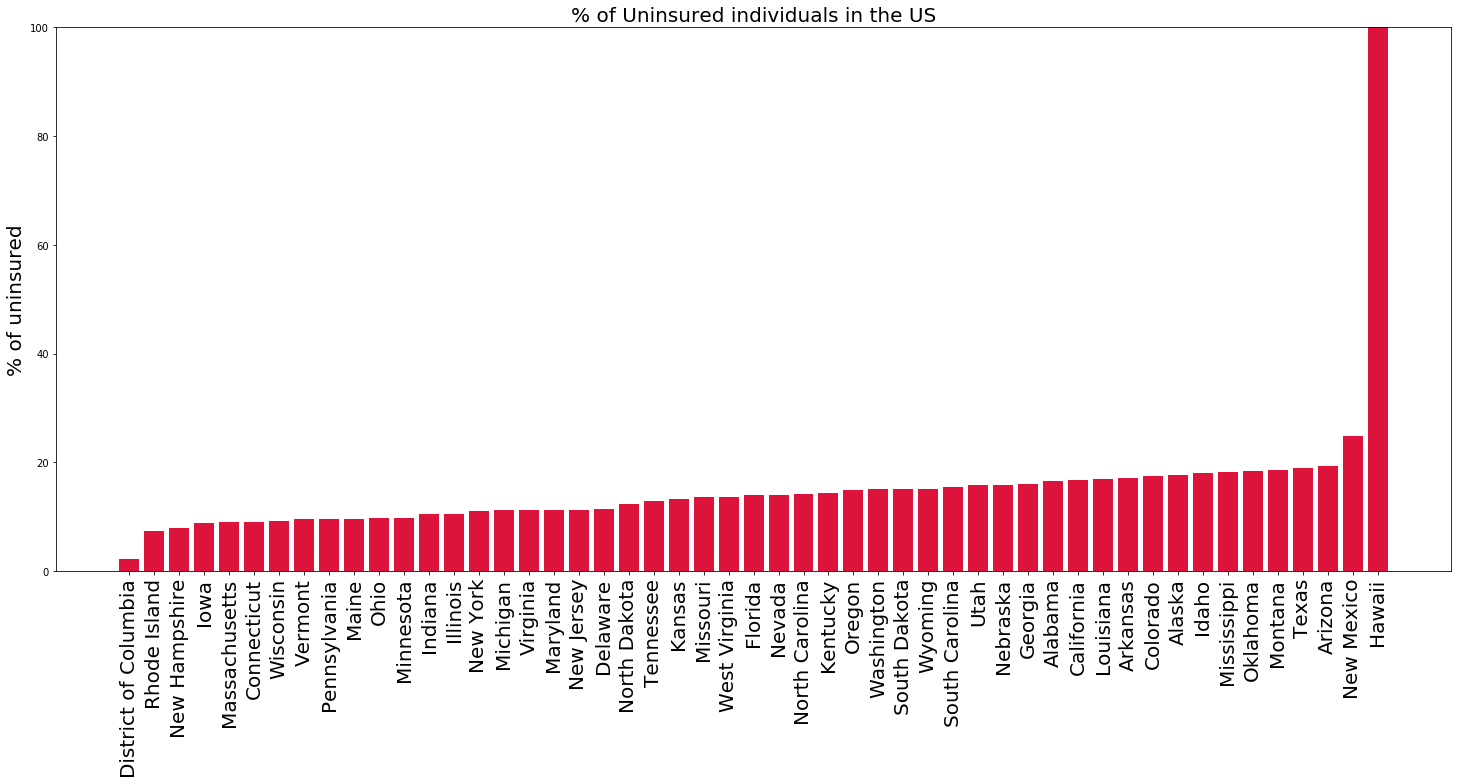

In [10]:
# num of uninsured across states 


x= uninsured_df['States']
y= uninsured_df['Uninsured%avg']
fig = plt.figure(figsize = (25, 10)) 
  
# creating the bar plot 
plt.bar(x, y, color ='crimson',  
        width = 0.8) 
  
plt.xticks(fontsize=20, rotation=90)
plt.ylim((0,100))
plt.ylabel("% of uninsured", fontsize=20) 
plt.title("% of Uninsured individuals in the US", fontsize=20) 

plt.savefig('Uninsured%byState.png')
plt.show() 


In [11]:
#get PCPs No. averages for each state

PCPs_y=[]
state_x=[]
for i in df_clean.CHSI_State_Name.unique():
    a= statistics.mean(df_clean[df_clean['CHSI_State_Name']== i]['Prim_Care_Phys_Rate'])
    PCPs_y.append(a)
    state_x.append(i)
    
d = {'States':state_x,'PCPsNo.':PCPs_y}
PCPs_df= pd.DataFrame(d)
PCPs_df.sort_values('PCPsNo.', inplace= True)

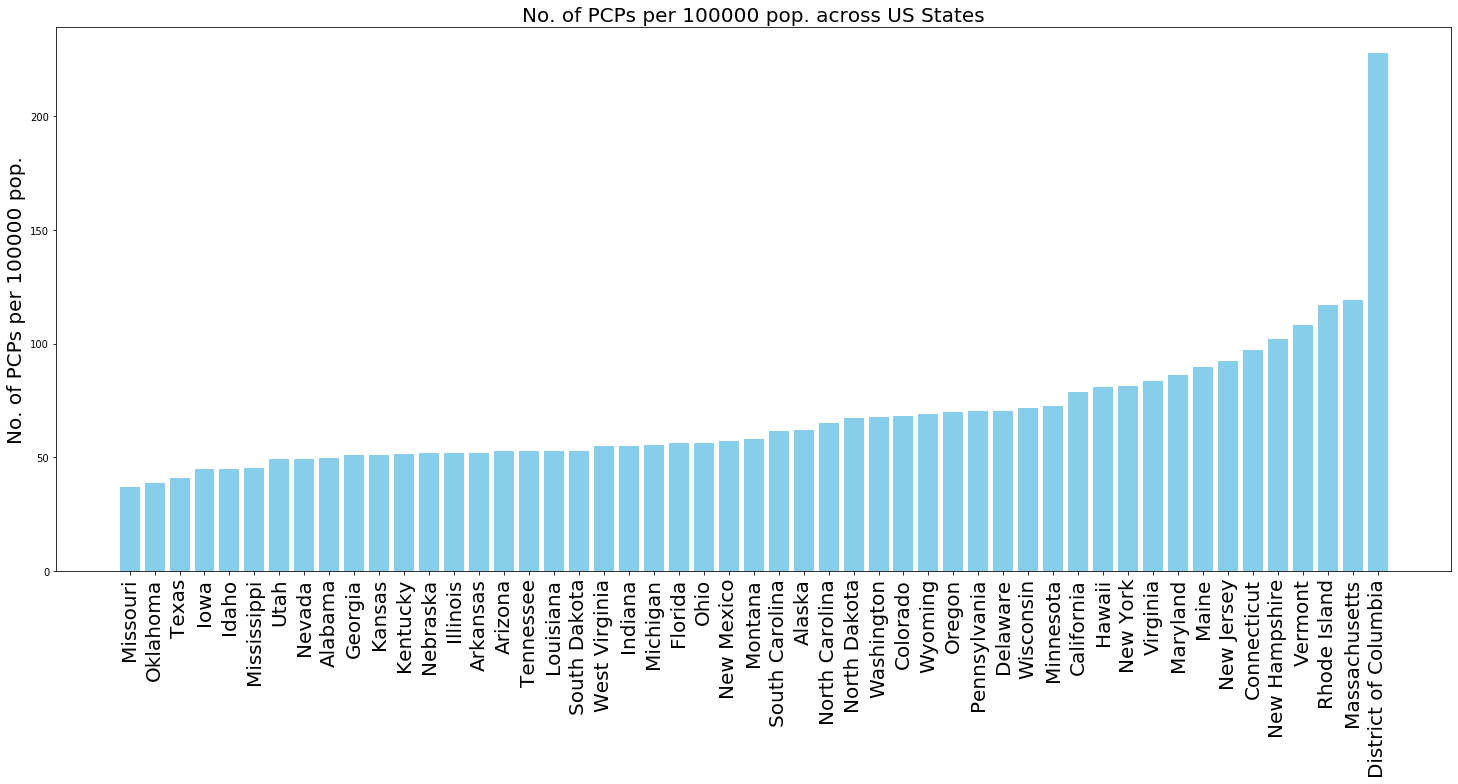

In [12]:
# num of PCPs across states 

x= PCPs_df['States']
y= PCPs_df['PCPsNo.']
fig = plt.figure(figsize = (25, 10)) 

# creating the bar plot 
plt.bar(x, y, color = 'skyblue',  
        width = 0.8) 
  
plt.xticks(fontsize=20, rotation=90)
#plt.ylim((0,100))
plt.ylabel("No. of PCPs per 100000 pop.", fontsize=20) 
plt.title("No. of PCPs per 100000 pop. across US States", fontsize=20) 

plt.savefig('PCPsbyState.png')
plt.show() 


## K-MEANS CLUSTERING
### This is an unlabeled dataset in which we want to group our counties. Therefore, we will leverage k-means clustering to group our data.

In [13]:
#K-means clustering

#select X values
X= df_clean.iloc[:, 6:-1].values

#normalize the data for kmeans
scaler = preprocessing.MinMaxScaler() 
X = scaler.fit_transform(X)

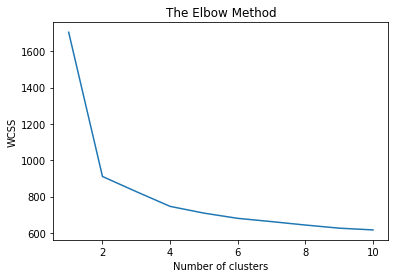

In [14]:
#The elbow method to find the right amount of clusters to use

wcss= []
for i in range(1,11):
    kmeans= KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
# training the model and applying it on our normalized dataset
kmeans= KMeans(n_clusters=4, init='k-means++', random_state= 10)

y_pred= kmeans.fit_predict(X)
print(y_pred)

[0 2 0 ... 1 2 3]


In [16]:
#Adding a cluster column and sorting the counties by which cluster they belong to
df_clean['cluster']= y_pred
sortcounties = df_clean.sort_values(['cluster'])

sortcounties

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,county,CHSI_State_Name,CHSI_State_Abbr,Population_Size,Poverty,Age_19_Under,Age_19_64,Age_65_84,Age_85_and_Over,ALE,Pap_Smear,Mammogram,Proctoscopy,Pneumo_Vax,Flu_Vac,LBW,Premature,Late_Care,Infant_Mortality,Brst_Cancer,Col_Cancer,CHD,Lung_Cancer,Stroke,Obesity,High_Blood_Pres,Diabetes,Uninsured,Elderly_Medicare,Disabled_Medicare,Prim_Care_Phys_Rate,Dentist_Rate,Community_Health_Center_Ind,Uninsured%,cluster
0,1.0,1.0,Autauga,Autauga_Alabama,Alabama,AL,48612.0,10.4,26.9,62.3,9.8,0.9,74.9,82.009561,80.03255,43.145354,65.526638,69.432507,8.1,14.3,12.9,5.900000,34.100000,15.90000,172.4,65.30000,73.9,24.500000,29.100000,14.200000,5690.0,4762.0,1209.0,45.3,22.6,1.0,11.704929,0
1472,28.0,147.0,Walthall,Walthall_Mississippi,Mississippi,MS,15460.0,22.3,27.2,58.1,12.8,1.9,73.4,82.009561,80.03255,43.145354,65.526638,69.432507,9.3,14.0,21.6,11.000000,31.600000,22.80000,232.2,58.70000,57.1,32.000000,26.480946,12.800000,3510.0,1703.0,561.0,64.7,19.4,1.0,22.703752,0
1473,28.0,149.0,Warren,Warren_Mississippi,Mississippi,MS,49131.0,17.6,28.4,59.9,10.3,1.4,73.2,81.900000,76.30000,39.900000,65.526638,69.432507,11.4,16.4,17.6,8.600000,35.700000,23.10000,248.1,66.90000,82.9,33.500000,34.100000,12.300000,8371.0,5568.0,1405.0,75.3,40.7,1.0,17.038123,0
1474,28.0,151.0,Washington,Washington_Mississippi,Mississippi,MS,59220.0,28.4,31.0,57.6,10.0,1.4,71.1,82.900000,70.20000,30.900000,65.526638,69.432507,12.0,18.6,28.7,11.700000,35.100000,26.50000,295.5,75.60000,65.1,35.700000,40.800000,10.200000,14183.0,6890.0,2280.0,54.0,37.1,1.0,23.949679,0
1478,28.0,159.0,Winston,Winston_Mississippi,Mississippi,MS,19870.0,20.0,25.7,58.5,13.8,2.0,75.3,82.500000,80.03255,43.145354,65.526638,69.432507,9.8,14.8,27.0,9.700000,30.200000,19.40000,146.7,64.80000,73.3,38.900000,26.480946,9.500000,3244.0,2797.0,682.0,25.2,20.1,1.0,16.326120,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,26.0,15.0,Barry,Barry_Michigan,Michigan,MI,59892.0,7.3,25.7,62.2,10.6,1.5,76.8,82.009561,80.03255,43.145354,65.526638,69.432507,7.8,11.7,14.6,5.600000,24.300000,20.70000,157.8,52.20000,63.6,23.400000,30.100000,9.000000,4432.0,6132.0,879.0,45.1,23.4,2.0,7.399987,3
1235,26.0,13.0,Baraga,Baraga_Michigan,Michigan,MI,8746.0,11.2,21.4,61.8,13.7,3.1,76.4,82.009561,80.03255,43.145354,65.526638,69.432507,5.3,9.3,16.2,4.800000,18.600000,15.60000,344.9,59.90000,71.2,24.145189,26.480946,7.810188,857.0,1406.0,286.0,57.2,34.3,2.0,9.798765,3
1635,30.0,79.0,Prairie,Prairie_Montana,Montana,MT,1105.0,12.3,15.7,61.7,18.7,3.8,77.5,82.009561,80.03255,43.145354,65.526638,69.432507,7.5,13.1,22.4,7.410028,26.325236,21.35487,150.8,58.63983,64.1,24.145189,26.480946,7.810188,228.0,269.0,26.0,90.5,0.0,2.0,20.633484,3
1250,26.0,43.0,Dickinson,Dickinson_Michigan,Michigan,MI,28032.0,9.2,22.9,56.9,16.2,3.9,78.0,82.009561,80.03255,43.145354,65.526638,69.432507,5.3,9.9,11.1,4.300000,19.300000,19.20000,171.5,46.90000,64.1,20.700000,26.480946,8.600000,2241.0,4740.0,743.0,82.0,57.1,2.0,7.994435,3


In [17]:
#creating a dataframe with all the means of each feature in each cluster
df_clean1=df_clean[df_clean['cluster']== 0]
df_clean2=df_clean[df_clean['cluster']== 1]
df_clean3=df_clean[df_clean['cluster']== 2]
df_clean4=df_clean[df_clean['cluster']== 3]

d0= {'features':['Num of counties','Population_Size', 'Poverty', 'Age_19_Under', 'Age_19_64', 'Age_65_84',
       'Age_85_and_Over', 'Pap_Smear', 'Mammogram', 'Proctoscopy',
       'Pneumo_Vax', 'Flu_Vac', 'LBW', 'Premature', 'Late_Care',
       'Infant_Mortality', 'Brst_Cancer', 'Col_Cancer', 'CHD', 'Lung_Cancer',
       'Stroke', 'Obesity', 'High_Blood_Pres', 'Diabetes', 'Uninsured',
       'Elderly_Medicare', 'Disabled_Medicare', 'Prim_Care_Phys_Rate',
       'Dentist_Rate', 'Community_Health_Center_Ind'],
     'cluster1':[sortcounties[sortcounties['cluster']== 0]['State_FIPS_Code'].count(), df_clean1['Population_Size'].mean(), df_clean1['Poverty'].mean(), 
                 df_clean1['Age_19_Under'].mean(), df_clean1['Age_19_64'].mean(),
                 df_clean1['Age_65_84'].mean(),df_clean1['Age_85_and_Over'].mean(),
                 df_clean1['Pap_Smear'].mean(),df_clean1['Mammogram'].mean(),df_clean1['Proctoscopy'].mean(),
                 df_clean1['Pneumo_Vax'].mean(),df_clean1['Flu_Vac'].mean(),df_clean1['LBW'].mean(),
                 df_clean1['Premature'].mean(), df_clean1['Late_Care'].mean(),df_clean1['Infant_Mortality'].mean(),
                 df_clean1['Brst_Cancer'].mean(),df_clean1['Col_Cancer'].mean(),df_clean1['CHD'].mean(),
                 df_clean1['Lung_Cancer'].mean(),df_clean1['Stroke'].mean(),df_clean1['Obesity'].mean(),
                 df_clean1['High_Blood_Pres'].mean(),df_clean1['Diabetes'].mean(),df_clean1['Uninsured'].mean(),
                 df_clean1['Elderly_Medicare'].mean(),df_clean1['Disabled_Medicare'].mean(),
                 df_clean1['Prim_Care_Phys_Rate'].mean(),df_clean1['Dentist_Rate'].mean(),
                 df_clean1['Community_Health_Center_Ind'].mean()], 
     'cluster2':[sortcounties[sortcounties['cluster']== 1]['State_FIPS_Code'].count(), df_clean2['Population_Size'].mean(), df_clean2['Poverty'].mean(), df_clean2['Age_19_Under'].mean(), 
                 df_clean2['Age_19_64'].mean(),df_clean2['Age_65_84'].mean(),df_clean2['Age_85_and_Over'].mean(),
                 df_clean2['Pap_Smear'].mean(),df_clean2['Mammogram'].mean(),df_clean2['Proctoscopy'].mean(),
                 df_clean2['Pneumo_Vax'].mean(),df_clean2['Flu_Vac'].mean(),df_clean2['LBW'].mean(),
                 df_clean2['Premature'].mean(), df_clean2['Late_Care'].mean(),df_clean2['Infant_Mortality'].mean(),
                 df_clean2['Brst_Cancer'].mean(),df_clean2['Col_Cancer'].mean(),df_clean2['CHD'].mean(),
                 df_clean2['Lung_Cancer'].mean(),df_clean2['Stroke'].mean(),df_clean2['Obesity'].mean(),
                 df_clean2['High_Blood_Pres'].mean(),df_clean2['Diabetes'].mean(),df_clean2['Uninsured'].mean(),
                 df_clean2['Elderly_Medicare'].mean(),df_clean2['Disabled_Medicare'].mean(),
                 df_clean2['Prim_Care_Phys_Rate'].mean(),df_clean2['Dentist_Rate'].mean(),
                 df_clean2['Community_Health_Center_Ind'].mean()], 
     'cluster3':[sortcounties[sortcounties['cluster']== 2]['State_FIPS_Code'].count(), df_clean3['Population_Size'].mean(), df_clean3['Poverty'].mean(), df_clean3['Age_19_Under'].mean(), 
                 df_clean3['Age_19_64'].mean(),df_clean3['Age_65_84'].mean(),df_clean3['Age_85_and_Over'].mean(),
                 df_clean3['Pap_Smear'].mean(),df_clean3['Mammogram'].mean(),df_clean3['Proctoscopy'].mean(),
                 df_clean3['Pneumo_Vax'].mean(),df_clean3['Flu_Vac'].mean(),df_clean3['LBW'].mean(),
                 df_clean3['Premature'].mean(), df_clean3['Late_Care'].mean(),df_clean3['Infant_Mortality'].mean(),
                 df_clean3['Brst_Cancer'].mean(),df_clean3['Col_Cancer'].mean(),df_clean3['CHD'].mean(),
                 df_clean3['Lung_Cancer'].mean(),df_clean3['Stroke'].mean(),df_clean3['Obesity'].mean(),
                 df_clean3['High_Blood_Pres'].mean(),df_clean3['Diabetes'].mean(),df_clean3['Uninsured'].mean(),
                 df_clean3['Elderly_Medicare'].mean(),df_clean3['Disabled_Medicare'].mean(),
                 df_clean3['Prim_Care_Phys_Rate'].mean(),df_clean3['Dentist_Rate'].mean(),
                 df_clean3['Community_Health_Center_Ind'].mean()], 
     'cluster4':[sortcounties[sortcounties['cluster']== 3]['State_FIPS_Code'].count(), df_clean4['Population_Size'].mean(), df_clean4['Poverty'].mean(), df_clean4['Age_19_Under'].mean(), 
                 df_clean4['Age_19_64'].mean(),df_clean4['Age_65_84'].mean(),df_clean4['Age_85_and_Over'].mean(),
                 df_clean4['Pap_Smear'].mean(),df_clean4['Mammogram'].mean(),df_clean4['Proctoscopy'].mean(),
                 df_clean4['Pneumo_Vax'].mean(),df_clean4['Flu_Vac'].mean(),df_clean4['LBW'].mean(),
                 df_clean4['Premature'].mean(), df_clean4['Late_Care'].mean(),df_clean4['Infant_Mortality'].mean(),
                 df_clean4['Brst_Cancer'].mean(),df_clean4['Col_Cancer'].mean(),df_clean4['CHD'].mean(),
                 df_clean4['Lung_Cancer'].mean(),df_clean4['Stroke'].mean(),df_clean4['Obesity'].mean(),
                 df_clean4['High_Blood_Pres'].mean(),df_clean4['Diabetes'].mean(),df_clean4['Uninsured'].mean(),
                 df_clean4['Elderly_Medicare'].mean(),df_clean4['Disabled_Medicare'].mean(),
                 df_clean4['Prim_Care_Phys_Rate'].mean(),df_clean4['Dentist_Rate'].mean(),
                 df_clean4['Community_Health_Center_Ind'].mean()]}

mean_df= pd.DataFrame(data= d0)

print("These are the means of each feature for the different clusters:")

#label_df= mean_df.transpose()
#new_header = mean_df.iloc[0] 
#label_df.columns = new_header 
#label_df = mean_df.iloc[1:]
mean_df


These are the means of each feature for the different clusters:


,features,cluster1,cluster2,cluster3,cluster4
0,Num of counties,602.000000,735.000000,809.000000,995.000000
1,Population_Size,78489.906977,34656.787755,228390.967862,39114.018090
2,Poverty,18.244020,15.757415,11.612979,10.023467
3,Age_19_Under,25.824917,25.297415,24.944129,23.715879
4,Age_19_64,60.205980,60.362857,61.049320,59.667739
5,Age_65_84,12.226578,12.543810,12.023115,13.934472
6,Age_85_and_Over,1.744518,1.797007,1.983313,2.682412
7,Pap_Smear,82.079221,81.692959,81.973555,82.230561
8,Mammogram,79.720264,79.559994,80.506688,80.185061
9,Proctoscopy,42.283273,42.080275,44.609660,43.263126


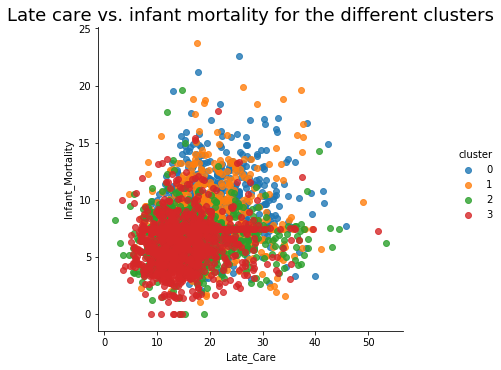

In [18]:
sns.lmplot(x='Late_Care',y='Infant_Mortality',data=df_clean,hue='cluster',fit_reg=False)
plt.title('Late care vs. infant mortality for the different clusters', size= 18)
plt.show()

Radar chart that shows the difference in features for the different clusters


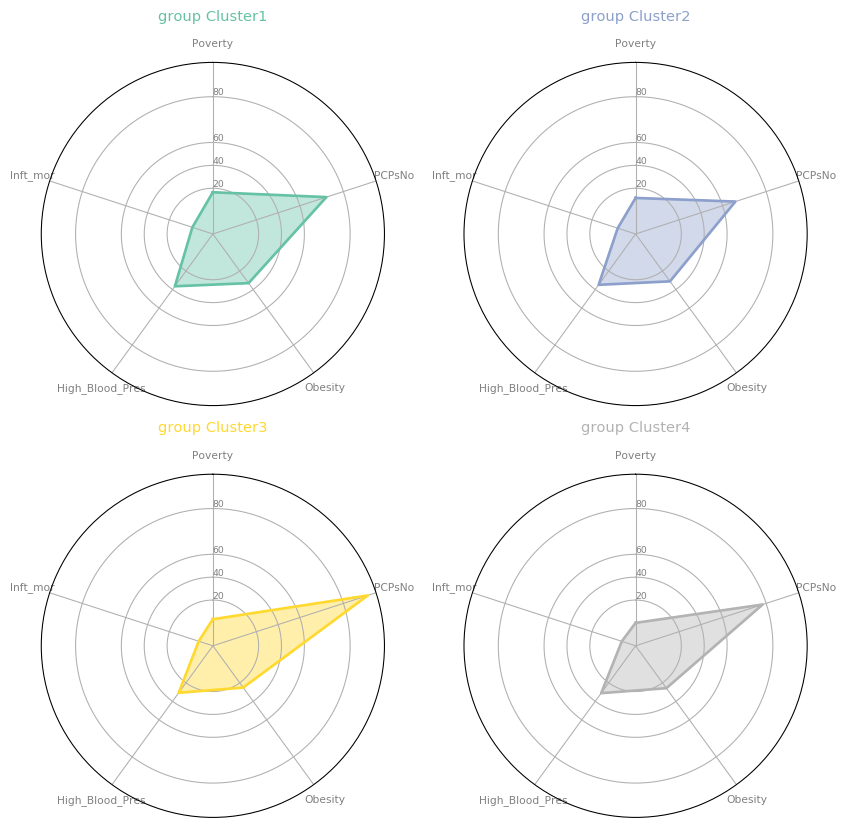

In [19]:
#radar chart
#Main source: https://python-graph-gallery.com/392-use-faceting-for-radar-chart/

# Set data
df = pd.DataFrame({
'group': ['Cluster1','Cluster2','Cluster3','Cluster4'],
'Poverty': [df_clean1['Poverty'].mean(), df_clean2['Poverty'].mean(), df_clean3['Poverty'].mean(), df_clean4['Poverty'].mean()],
'PCPsNo': [df_clean1['Prim_Care_Phys_Rate'].mean(), df_clean2['Prim_Care_Phys_Rate'].mean(), df_clean3['Prim_Care_Phys_Rate'].mean(), df_clean4['Prim_Care_Phys_Rate'].mean()],
'Obesity': [df_clean1['Obesity'].mean(), df_clean2['Obesity'].mean(), df_clean3['Obesity'].mean(), df_clean4['Obesity'].mean()],
'High_Blood_Pres': [df_clean1['High_Blood_Pres'].mean(), df_clean2['High_Blood_Pres'].mean(), df_clean3['High_Blood_Pres'].mean(), df_clean4['High_Blood_Pres'].mean()],
'Inft_mor': [df_clean1['Infant_Mortality'].mean(), df_clean2['Infant_Mortality'].mean(), df_clean3['Infant_Mortality'].mean(), df_clean4['Infant_Mortality'].mean()]
})
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):
 
    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([20,30,40, 60, 80, 100], ["20","40","60", "80", "100"], color="grey", size=7)
    plt.ylim(0,75)

    # Ind1
    values=df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

# ------- PART 2: Apply to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title='group '+df['group'][row], color=my_palette(row))
    
print('Radar chart that shows the difference in features for the different clusters')